In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [2]:
df=pd.read_csv("1. Regression - Module - (Housing Prices).csv")
df.tail()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287
21612,1523300157,14 October 2017,325000.0,2,0.75,1020.0,1076.0,2.0,No,None,...,7,1020.0,0,10,0,98144.0,47.5941,-122.299,1020.0,1357


# checking the missing values in the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [4]:
#from the above cell we find the missing values


In [5]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

# here our target variable is "SALE_PRICE"

In [6]:
df["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [7]:
df.dropna(inplace=True,subset=["Sale Price"]) # removing the missing values in the target variable

In [8]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

# treating the missing values in the data set


In [9]:
cat_col=[i for i in df.columns if df[i].dtypes=="object"]

In [10]:
cat_col

['Date House was Sold',
 'Waterfront View',
 'No of Times Visited',
 'Condition of the House']

In [11]:
numerical_columns=["No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)"
                   ,"Area of the House from Basement (in Sqft)","Latitude","Longitude",
                   "Living Area after Renovation (in Sqft)"]

In [12]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="median")
df[numerical_columns]=impute.fit_transform(df[numerical_columns])

In [13]:
df["Zipcode"].shape
z=df["Zipcode"].values.reshape(-1,1)
impute=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Zipcode"]=impute.fit_transform(z)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# checking the outliers in the target variable

Text(0.5, 1.0, ' OUTLIERS IN THE DATA ')

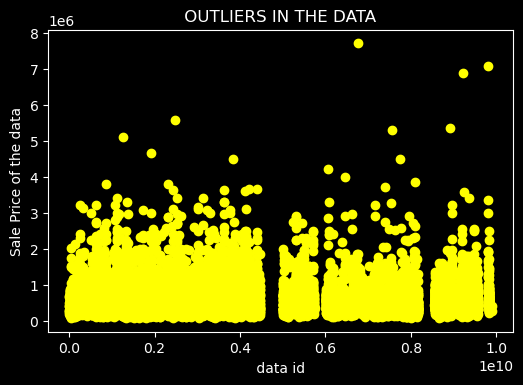

In [15]:
plt.figure(dpi=100)
plt.scatter(x=df["ID"],y=df["Sale Price"],label="outliers",color="yellow")
plt.xlabel(" data id ")
plt.ylabel("Sale Price of the data")
plt.title(" OUTLIERS IN THE DATA ")

Text(0.5, 1.0, 'distribution of the sale price')

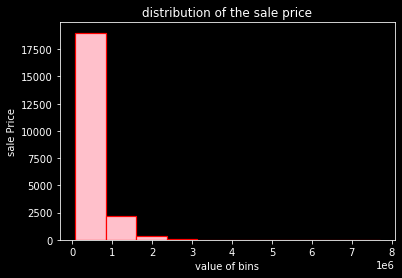

In [16]:
plt.hist(df["Sale Price"],bins=10,color="pink",edgecolor='red', linewidth=1.2)
plt.xlabel("value of bins")
plt.ylabel("sale Price")
plt.title("distribution of the sale price")

In [17]:
#from the above cell we find the outliers in the traget variable
# should treat the outliers 

# there are 4 ways of treating the outliers 


# 1.Deletion(delition of the entire row containing the outliers)



# 2.Imputation(replacing the outlier values with the limit values Or mean mode etc)


# 3.Data Transformation(to treat the outliers the variable data is tranformed to log values , sqrt, cube roots)

# 4.Binning(Different bins are formed to treat the outliers)



# mostly used --------> Imputation


In [18]:
#this is the python fun to impute the vaalues in the dataset and treat the out liers
def imputer(value):
    if value<lower_limit:
        return lower_limit
    if value>upper_limit:
        return upper_limit
    else:
        return value

In [19]:
df["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [20]:
# here we have mean value > than the median (50%) value .
# from here we conclude that the data is not normally skewed.
q1=df["Sale Price"].quantile(0.25)
q2=df["Sale Price"].quantile(0.75)
# IQR  is the inter quantile range (q2-q1)
iqr=q2-q1

In [21]:
(q1,q2),iqr

((321950.0, 645000.0), 323050.0)

In [22]:
upper_limit= q2 + 1.5*iqr
lower_limit= q1 - 1.5*iqr
(upper_limit,lower_limit)

(1129575.0, -162625.0)

In [23]:
lower_limit=df["Sale Price"].min()

In [24]:
(lower_limit,upper_limit)

(75000.0, 1129575.0)

In [25]:
df["Sale Price"]=df["Sale Price"].map(imputer)

In [26]:
df["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

Text(0.5, 1.0, ' OUTLIERS IN THE DATA ')

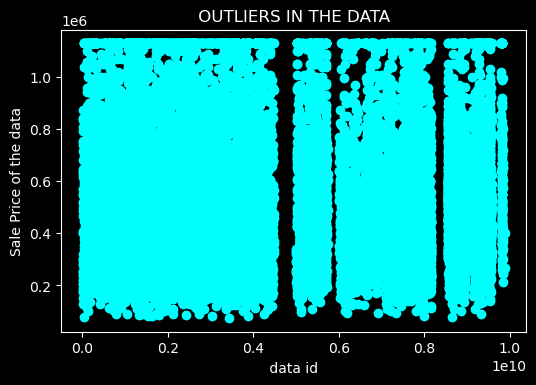

In [27]:
plt.figure(dpi=100)
plt.scatter(x=df["ID"],y=df["Sale Price"],label="outliers",color="cyan")
plt.xlabel(" data id ")
plt.ylabel("Sale Price of the data")
plt.title(" OUTLIERS IN THE DATA ")

Text(0.5, 1.0, 'distribution of the sale price')

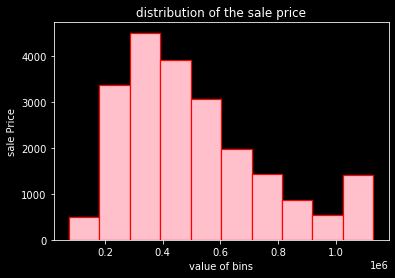

In [28]:
plt.hist(df["Sale Price"],bins=10,color="pink",edgecolor='red', linewidth=1.2)
plt.xlabel("value of bins")
plt.ylabel("sale Price")
plt.title("distribution of the sale price")

In [29]:
# last bin is different due to the limit values in the data

In [30]:

pd.set_option("display.max_columns",35)
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [31]:
df["ever_renovated"]=np.where(df["Renovated Year"]==0,"No","Yes")

In [32]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,No
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,No
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,No
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,No


In [33]:
df["purchase_year"]=pd.DatetimeIndex(df["Date House was Sold"]).year

In [34]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,purchase_year
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,No,2017
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,No,2016
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,No,2017
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,No,2016


In [35]:
df["year_since_renovation"]=np.where(df["ever_renovated"]=="Yes",abs(df["purchase_year"]-df["Renovated Year"]),0)

In [36]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,purchase_year,year_since_renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,No,2017,0
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,No,2016,0
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,No,2017,0
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,No,2016,0


In [37]:
df.drop(columns=["Date House was Sold","Renovated Year","purchase_year"],inplace=True)

In [38]:
df

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [39]:
df.drop(columns="ID",inplace=True)

In [40]:
df["Waterfront View"].unique()
df["Waterfront View"]=df["Waterfront View"].map({'No':0, 'Yes':1})

In [41]:
df["No of Times Visited"].unique()
df["No of Times Visited"]=df["No of Times Visited"].map({'None':0, 'Thrice':3, 'Four':4, 'Twice':2, 'Once':1})

In [42]:
df=pd.get_dummies(df,columns=["Condition of the House"],drop_first=True)

In [43]:
df["ever_renovated"].unique()
df["ever_renovated"]=df["ever_renovated"].map({'No':0, 'Yes':1})

In [44]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,1,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,0,0,0,1,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,0,0,0,1,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,0,0,0,1,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,0,0,0,1,0,0


In [45]:
len(df["Zipcode"].unique())

70

In [46]:
zip_table=df.groupby("Zipcode").agg({"Sale Price":"mean"}).sort_values("Sale Price",ascending=True)

In [47]:
zip_table

,Sale Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [48]:
zip_table["Zipcode_Group"]=pd.cut(zip_table["Sale Price"],bins = 10,
                                  labels=["Zipcode_Group_1","Zipcode_Group_2","Zipcode_Group_3",
                                          "Zipcode_Group_4","Zipcode_Group_5","Zipcode_Group_6",
                                          "Zipcode_Group_7","Zipcode_Group_8","Zipcode_Group_9",
                                          "Zipcode_Group_10"],include_lowest=True)
                                                                             
                                 
                                                                            

In [49]:
zip_table.drop(columns="Sale Price",inplace=True)

In [50]:
df=pd.merge(df,zip_table,left_on="Zipcode",how="left",right_index=True)

In [51]:
df=pd.get_dummies(df,columns=["Zipcode_Group"],drop_first=True )

In [52]:
df.drop(columns="Zipcode",inplace=True)

In [53]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Zipcode_Group_Zipcode_Group_10
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,1,26,0,1,0,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,8,1530.0,0,9,47.6993,-122.346,1530.0,1509,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,8,2310.0,0,4,47.5107,-122.362,1830.0,7200,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,7,1020.0,0,9,47.5944,-122.299,1020.0,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,8,1600.0,0,14,47.5345,-122.069,1410.0,1287,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = df['Sale Price']
X = scaler.fit_transform(df.drop(columns = ['Sale Price']))
X = pd.DataFrame(data = X, columns = df.drop(columns = ['Sale Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Zipcode_Group_Zipcode_Group_10
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.087181,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.210155,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.087181,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.758385,4.757239,-0.292306,0.735132,-0.597003,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.087181,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.210155,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.087181,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.210155,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.087181,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.210155,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [55]:
df.corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Zipcode_Group_Zipcode_Group_10
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.155894,0.356114,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.121617,0.065907,0.065995,0.012814,-0.037922,-0.069146,-0.210509,-0.136147,0.064580,0.212935,0.176705,0.298646,0.165760,0.313076,0.113726
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,-0.006578,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,0.018573,-0.007198,0.028148,0.004778,-0.008847,-0.051957,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.063761,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.050282,0.003551,-0.034281,0.190440,-0.166037,-0.077419,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.103841,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.055111,0.023503,-0.018182,0.102627,-0.083995,-0.065334,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.021605,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.007736,0.013835,-0.014503,-0.011334,0.013033,0.037619,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.023719,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,0.006297,-0.000901,-0.120524,0.317934,-0.257680,-0.055951,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
Waterfront View,0.155894,-0.006578,0.063761,0.103841,0.021605,0.023719,1.000000,0.401856,0.070332,0.072099,0.080595,0.026149,-0.014275,-0.041927,0.086467,0.030699,0.093291,0.105044,0.014239,-0.016604,0.008713,-0.001790,-0.016847,0.039995,-0.017093,-0.010197,-0.005600,0.009136,-0.009788,0.027633,0.006933
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,0.401856,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.104051,0.093546,0.034392,-0.037127,0.022690,-0.018557,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.070332,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,0.010010,-0.024388,-0.082628,0.197510,-0.140113,-0.090561,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.072099,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.023202,0.010491,-0.088424,0.194517,-0.142458,-0.058931,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398


<AxesSubplot:>

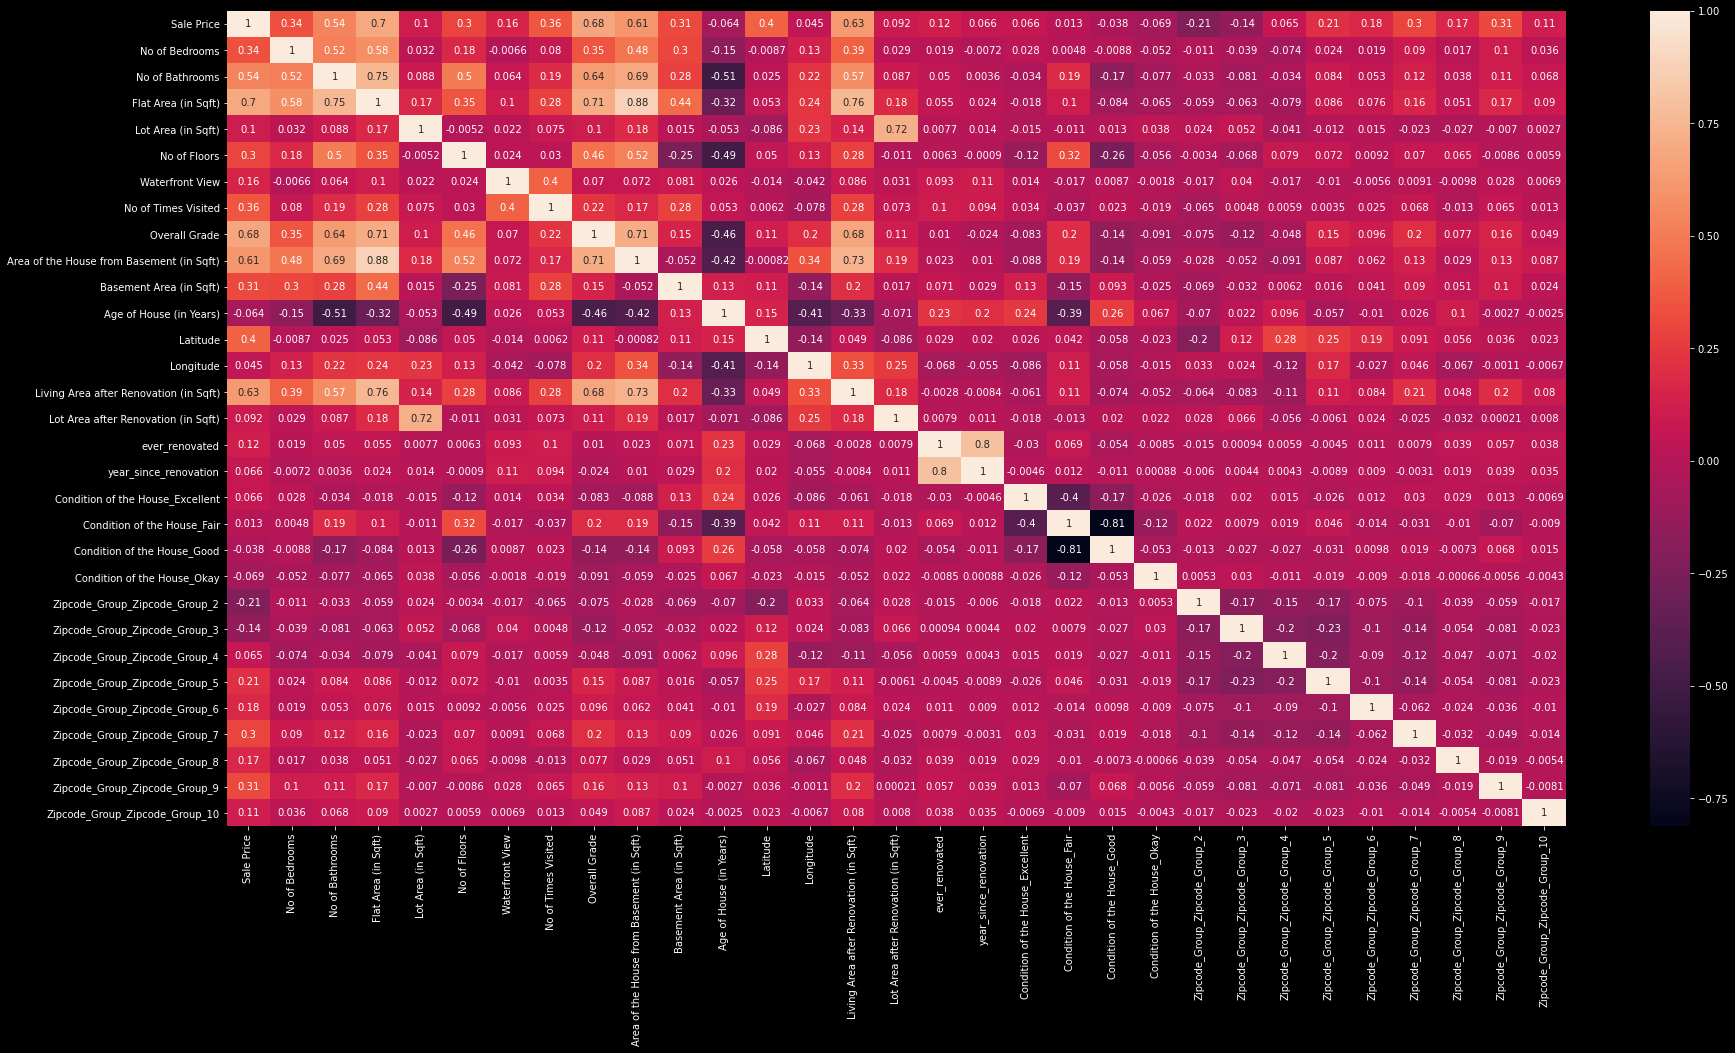

In [56]:
plt.figure(figsize=(30,15))
df.corr()
sns.heatmap(df.corr(),annot=True)

In [57]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
Waterfront View                                 1.208439
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
ever_renovated                                  2.955790
year_since_renovation                           2.788098
Condition of the House_Excellen

In [58]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [59]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [60]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition of the House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ever_renovated,year_since_renovation,Condition of the House_Excellent,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Zipcode_Group_Zipcode_Group_10
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.087181,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.210155,-0.167463,-0.292306,-0.597003,-0.089574,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.087181,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.758385,4.757239,-0.292306,-0.597003,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.087181,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.210155,-0.167463,-0.292306,-0.597003,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.087181,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.210155,-0.167463,3.421068,-0.597003,-0.089574,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.087181,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.210155,-0.167463,-0.292306,-0.597003,-0.089574,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [61]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 Waterfront View                              1.208288
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 ever_renovated                               2.955539
 year_since_renovation                        2.788064
 Condition of the House_Excellent             1.206487
 Condition of the House_Good                  1.251488
 Condition

In [62]:
X = vif_data
Y = df['Sale Price']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [65]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [66]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        10761.77007875,  27220.31313417,  59965.44665815,  80697.80906997,
        27729.56715434,  27873.90231343,  21397.40341959, -23854.32640243,
        17943.26729788,  -2896.98542901,  14594.33847962, -10179.085198  ,
        14239.3533334 ,   5095.97603572,  -2296.64888137,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [67]:
predictions = lr.predict(x_test)

In [68]:
lr.score(x_test, y_test)

0.8461987715586199

### 1. Residuals

In [69]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [70]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

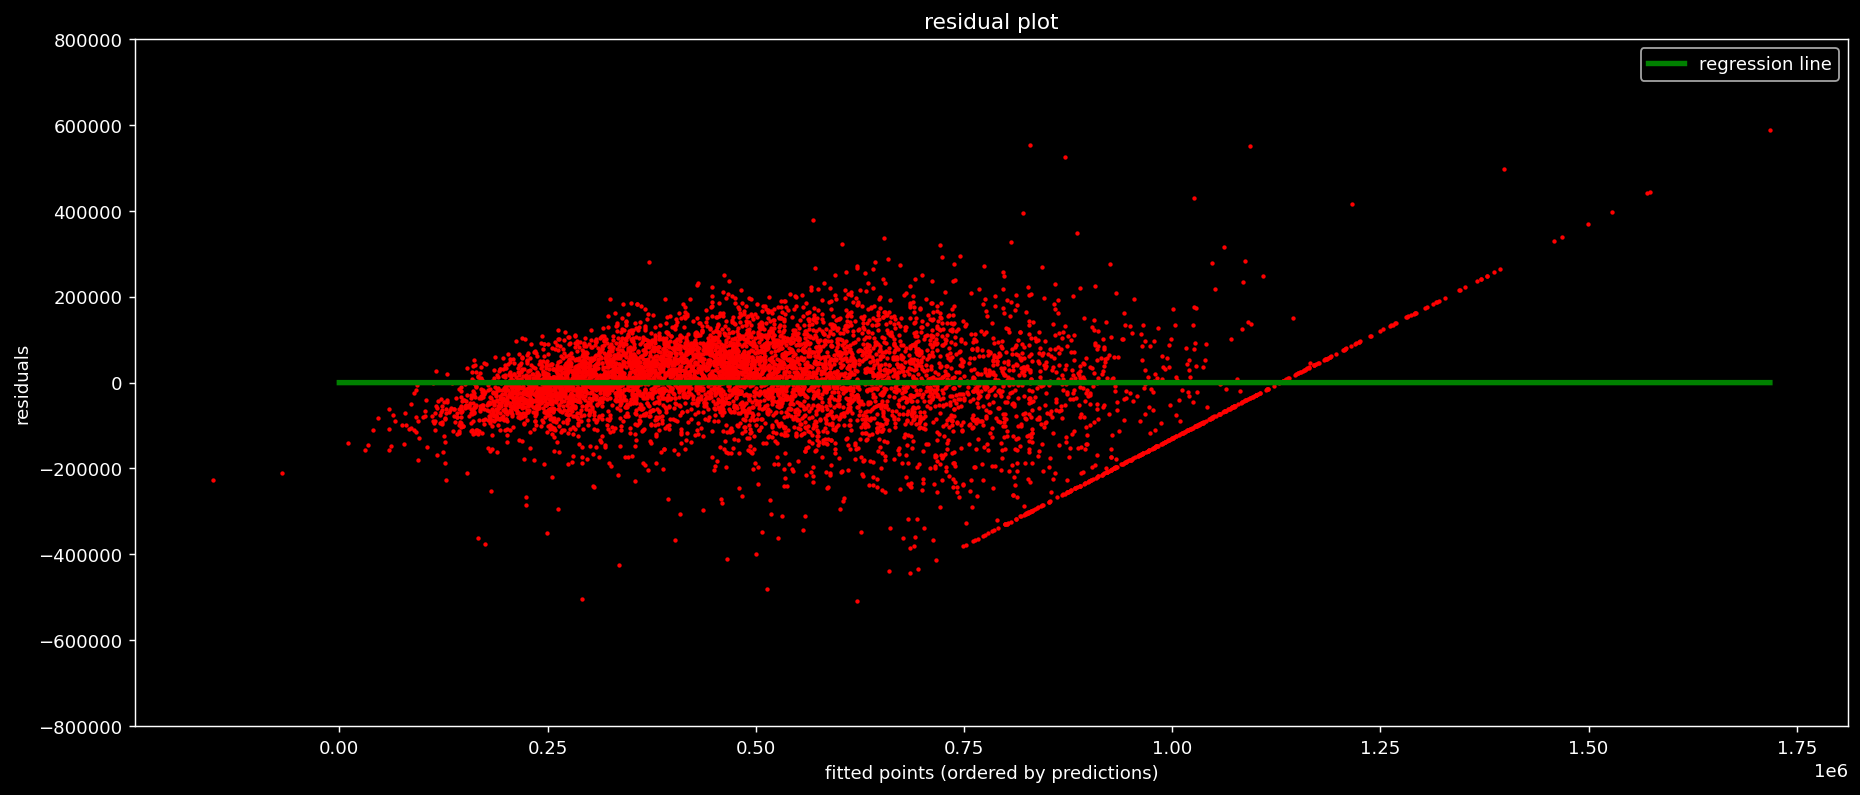

In [71]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

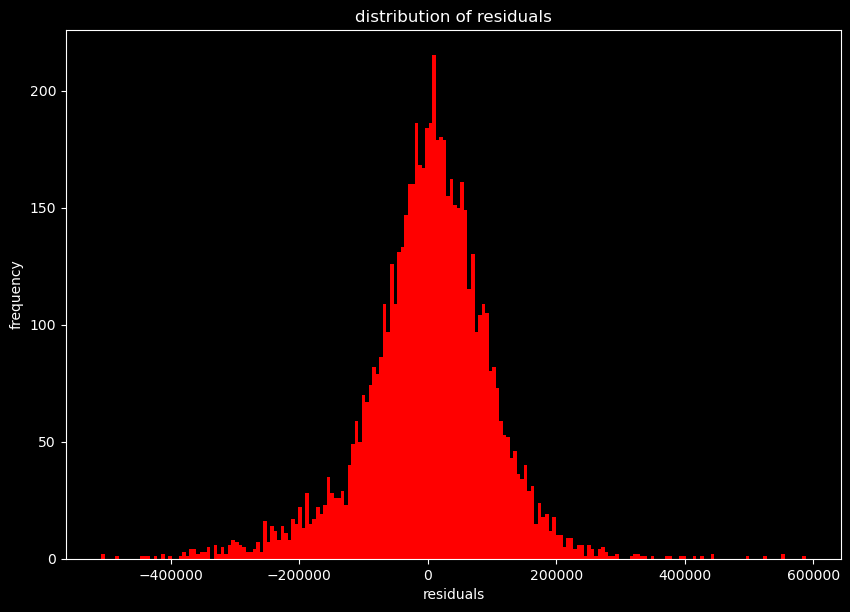

In [73]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [74]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


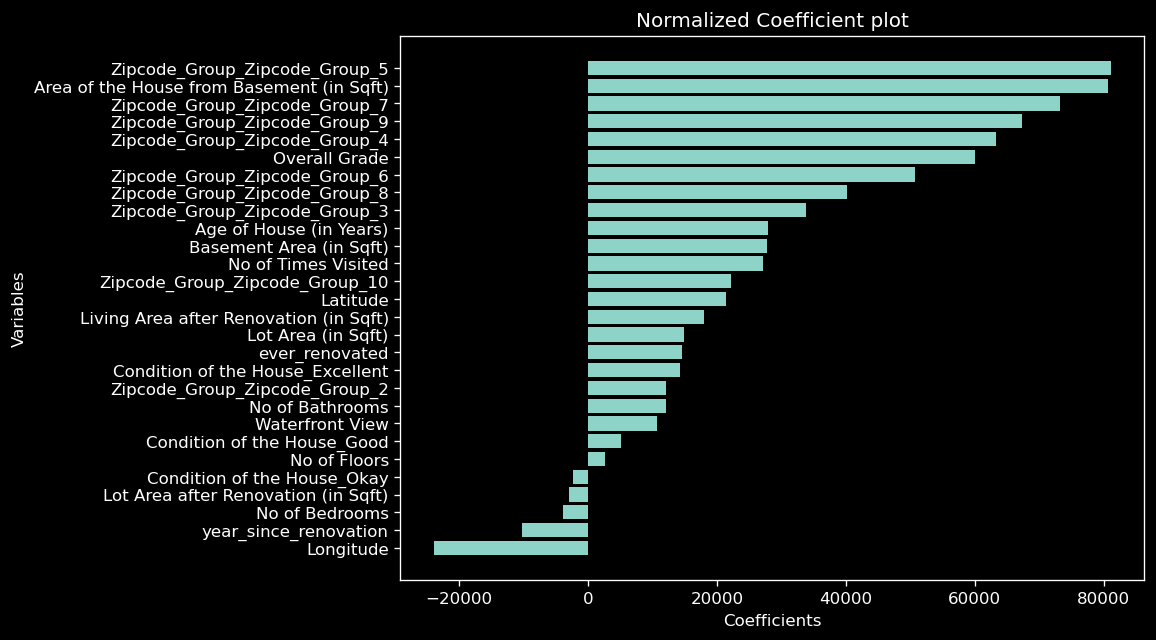

In [75]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()